In [2]:
import numpy as np 
import matplotlib.pyplot as plt

Let's define our f(x).$$f(x)=e^{-x^{2}}$$

In [229]:
def f1(x):
    return np.exp(-x**2)
    

Below we plot the graph of our Normal Distribution in order to have an idea of the integral we are going to calculate.

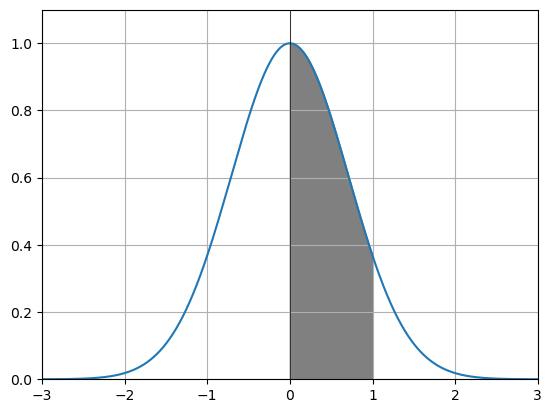

In [358]:
x=np.linspace(-10,10,20000)
x_integral=np.linspace(0,1,100)
plt.plot(x,f1(x))
plt.axis([-3, 3, 0, 1.1])  # [xmin, xmax, ymin, ymax]
plt.axvline(0,color='black', linewidth=0.5)
plt.fill_between(x_integral,f1(x_integral),color='gray')
plt.grid(True)
plt.show()

The generalized formula of the trapezoid rule states that:: 

$$\int_{a}^{b} f(x)dx\approx h\cdot[\frac{f(a)}{2}+\sum_{i=a+h}^{b-h}f(i)+\frac{f(b)}{2}] ,$$ 
$$h=\frac{b-a}{n} ,$$ where $n$ the partitions

In [327]:
def trapezoid(x_start,x_end,n,f):
    step=(x_end-x_start)/n
    sum=0
    i=x_start
    while(np.abs(i)<=np.abs(x_end)):
        if(i==x_start) or (i==x_end):
            sum+=f(i)/2
        else:
            sum+=f(i)
        i+=step
    sum*=step
    return sum, np.abs(sum-0.74682413279)

The $\frac{1}{3} Simpson $ formula states that: 

$$\int_{a}^{b} f(x)dx\approx \frac{h}{3}\cdot[f(a)+4f(a+h)+2f(a+2h)+...+4f(b-h)+f(b)] ,$$ 
$$h=\frac{b-a}{n} ,$$ where $n$ the partitions.

In [328]:
def Simpson(x_start,x_end,n,f):
    step=(x_end-x_start)/n
    sum=0
    i=x_start
    count=0
    while(np.abs(i)<=np.abs(x_end)):
        if(i==x_start) or (i==x_end):
            sum+=f(i)
        elif (count%2==1):
            sum+=4*f(i)
        else:
            sum+=2*f(i)
        count+=1
        i+=step
    sum*=step/3
    return sum,np.abs(sum-0.74682413279)
        
        

In [359]:
n_trapezoid=[10,20,40,80,160]
n_simpson=[2,4,8,16,32]

t_estim,t_errors=[],[]
for n in n_trapezoid:
    result , error=trapezoid(0,1,n,f1)
    t_estim.append(result)
    t_errors.append(error)
    
s_estim,s_errors=[],[]
for n in n_simpson:
    result , error=Simpson(0,1,n,f1)
    s_estim.append(result)
    s_errors.append(error)

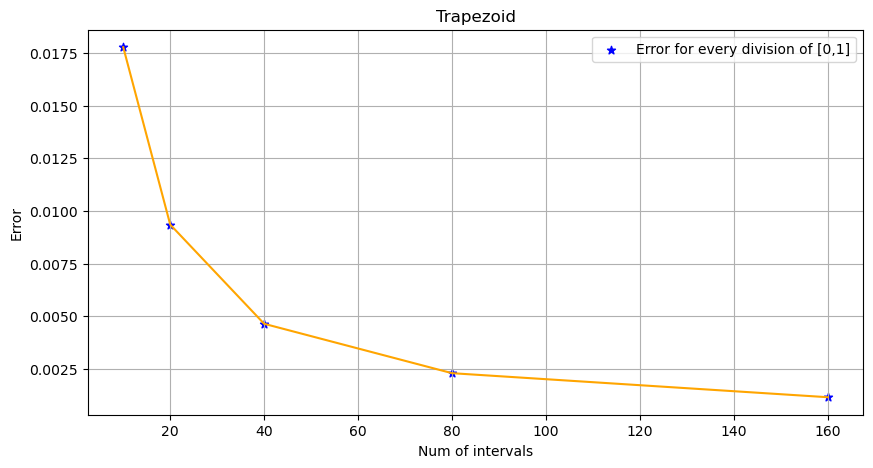

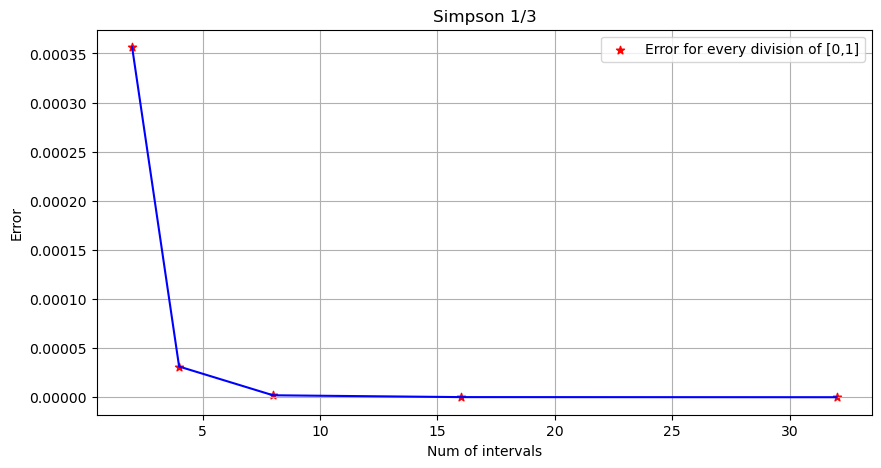

In [360]:
plt.figure(figsize=(10,5))
plt.plot(n_trapezoid,t_errors,color='orange')
plt.scatter(n_trapezoid,t_errors,marker='*',color='blue',label='Error for every division of [0,1]')
plt.grid(True)
plt.xlabel('Num of intervals')
plt.ylabel('Error')
plt.title('Trapezoid')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(n_simpson,s_errors,color='blue')
plt.scatter(n_simpson,s_errors,marker='*',color='red',label='Error for every division of [0,1]')
plt.grid(True)
plt.xlabel('Num of intervals')
plt.ylabel('Error')
plt.title('Simpson 1/3')
plt.legend()
plt.show()